In [ ]:
//@version=5
indicator("5 Candle Pattern Highlighter (1-Minute Only)", overlay=true, max_boxes_count=500, max_lines_count=500, max_labels_count=500)

// ─────────── Restrict to 1-Minute Timeframe
is_1m = timeframe.period == "1"

// ─────────── Candle Data
o = open
h = high
l = low
c = close

// ─────────── Utility Functions
isBull(c_, o_) => c_ > o_
isBear(c_, o_) => c_ < o_

// ─────────── 5-Candle Pattern Logic (from image)

// 5CP-T1 (Bearish)
bear5cp_t1 = isBear(c[4], o[4]) and                                    // 1st bearish
              isBear(c[3], o[3]) and c[3] < c[4] and                   // 2nd bearish, close < 1st close
              isBull(c[2], o[2]) and c[2] > c[3] and c[2] < o[3] and   // 3rd bullish, close > 2nd close but < 2nd open
              isBear(c[1], o[1]) and c[1] < c[2] and c[1] < o[2] and   // 4th bearish, close < 3rd close and < 2nd open
              isBear(c, o) and c < c[1] and c < c[3]                   // 5th bearish, close < 4th close and < 3rd close

// 5CP-T2 (Bullish)
bull5cp_t2 = isBull(c[4], o[4]) and                                    // 1st bullish
              isBull(c[3], o[3]) and c[3] > c[4] and                   // 2nd bullish, close > 1st close
              isBear(c[2], o[2]) and c[2] < c[3] and c[2] > o[3] and   // 3rd bearish, close < 2nd close but > 2nd open
              isBull(c[1], o[1]) and c[1] > c[2] and c[1] > o[2] and   // 4th bullish, close > 3rd close and > 2nd open
              isBull(c, o) and c > c[1] and c > c[2]                   // 5th bullish, close > 4th close and > 3rd open

// ─────────── Persistent Arrays
var box[] boxes = array.new_box()
var line[] lines = array.new_line()

// ─────────── Draw Helper Function (fixed to lock to price)
drawBoxAndLine(cond, baseBarOffset, extendBars, colorFill) =>
    if is_1m and cond
        baseOpen = open[baseBarOffset]
        baseClose = close[baseBarOffset]
        top = math.max(baseOpen, baseClose)
        bottom = math.min(baseOpen, baseClose)
        mid = (top + bottom) / 2

        x1 = bar_index - baseBarOffset
        x2 = x1 + extendBars

        bx = box.new(left=x1, right=x2, top=top, bottom=bottom, bgcolor=color.new(colorFill, 70), border_color=colorFill)
        ln = line.new(x1=x1, x2=x2, y1=mid, y2=mid, color=colorFill, width=1, style=line.style_dotted)
        array.push(boxes, bx)
        array.push(lines, ln)

// ─────────── Draw for 5CP Patterns
drawBoxAndLine(bear5cp_t1, 2, 5, color.rgb(255, 128, 0))
drawBoxAndLine(bull5cp_t2, 2, 5, color.rgb(0, 255, 128))

// ─────────── Plot Shapes (only on 1-minute)
plotshape(is_1m and bear5cp_t1, title="↓5CP-T1", text="↓5T1", style=shape.triangledown,
     location=location.abovebar, color=color.rgb(255, 128, 0), size=size.tiny)
plotshape(is_1m and bull5cp_t2, title="↑5CP-T2", text="↑5T2", style=shape.triangleup,
     location=location.belowbar, color=color.rgb(0, 255, 128), size=size.tiny)


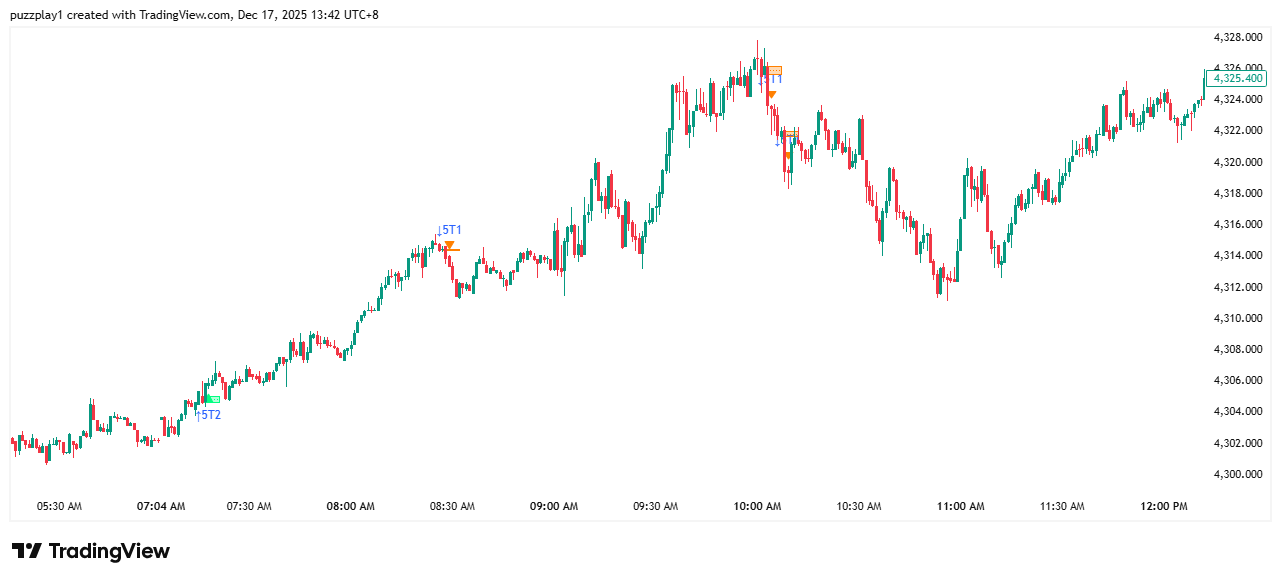